<a href="https://colab.research.google.com/github/vishnuvryeruva/PCA/blob/main/Dimensionality_Reduction_(IMAGE).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_pairs
import plotly.express as px

lfw = fetch_lfw_pairs()
X = lfw.data
X.shape

(2200, 5828)

In [16]:
lfw.target

array([1, 1, 1, ..., 0, 0, 0])

**PCA**

In [17]:
from sklearn.preprocessing import scale # Data scaling
from sklearn import decomposition #PCA

In [20]:
X = scale(X)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:173: UserWarning:

Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:190: UserWarning:

Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 



In [21]:
var = decomposition.PCA(2) # we need 2 pca.
pca = var.fit_transform(lfw.data)
 
pca.shape

(2200, 2)

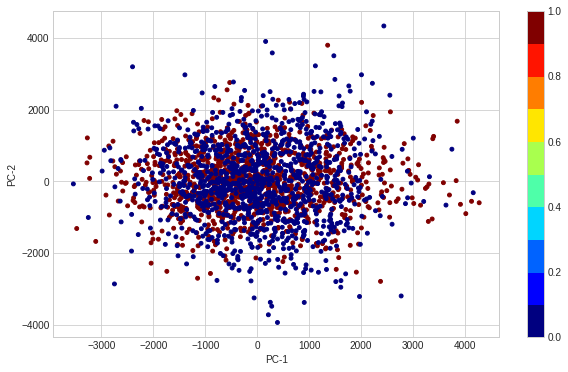

In [22]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize = (10, 6))
c_map = plt.cm.get_cmap('jet', 10)
plt.scatter(pca[:, 0], pca[:, 1], s = 15,
            cmap = c_map , c = lfw.target)
plt.colorbar()
plt.xlabel('PC-1') , plt.ylabel('PC-2')
plt.show()

In [23]:
print('n_components = 2 ', np.cumsum(var.explained_variance_ratio_ * 100)[1])

n_components = 2  24.120512


In [25]:
res = decomposition.PCA(3)
Data = res.fit_transform(lfw.data)
 
Data.shape

(2200, 3)

In [27]:
print('n_components = 3 ', np.cumsum(res.explained_variance_ratio_ * 100)[2])

n_components = 3  29.72651


In [29]:
x = px.scatter_3d(
    Data, x=0, y=1, z=2,
    color=lfw.target
)
x.update_traces(marker_size=4)

**LLE**

In [30]:
lle = LocallyLinearEmbedding(n_components=2, method='standard', eigen_solver='dense')
X_low =  lle.fit_transform(X)

In [31]:
X_low.shape

(2200, 2)

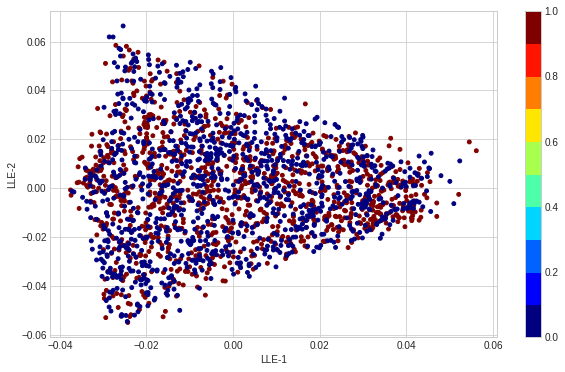

In [32]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize = (10, 6))
c_map = plt.cm.get_cmap('jet', 10)
plt.scatter(X_low[:, 0], X_low[:, 1], s = 15,
            cmap = c_map , c = lfw.target)
plt.colorbar()
plt.xlabel('LLE-1') , plt.ylabel('LLE-2')
plt.show()

In [33]:
reslle = LocallyLinearEmbedding(n_components = 3, method='standard', eigen_solver='dense')
res = reslle.fit_transform(X)

In [34]:
res.shape

(2200, 3)

In [36]:
z = px.scatter_3d(
     res, x=0, y=1, z=2,
    color=lfw.target,
)
z.update_traces(marker_size=4)

**T_SNE**

In [37]:
from sklearn.manifold import TSNE

In [38]:
tsne = TSNE(n_components=2, perplexity=30.0, random_state=None)
X_low = tsne.fit_transform(X)

In [39]:
X_low.shape

(2200, 2)

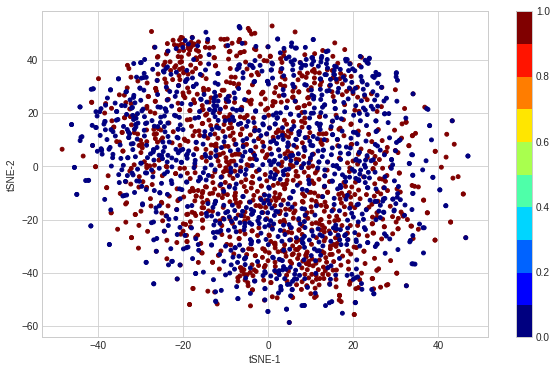

In [40]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize = (10, 6))
c_map = plt.cm.get_cmap('jet', 10)
plt.scatter(X_low[:, 0], X_low[:, 1], s = 15,
            cmap = c_map , c = lfw.target)
plt.colorbar()
plt.xlabel('tSNE-1') , plt.ylabel('tSNE-2')
plt.show()

In [41]:
restsne = TSNE(n_components = 3).fit_transform(X)

In [43]:
restsne.shape

(2200, 3)

In [44]:
z = px.scatter_3d(
     restsne, x=0, y=1, z=2,
    color=lfw.target,
)
z.update_traces(marker_size=4)

**ISOMAP**

In [45]:
from sklearn.manifold import Isomap

In [46]:
isomap = Isomap(n_neighbors=5, n_components=2, eigen_solver="dense")
X_low =  isomap.fit_transform(X);

In [47]:
X_low.shape

(2200, 2)

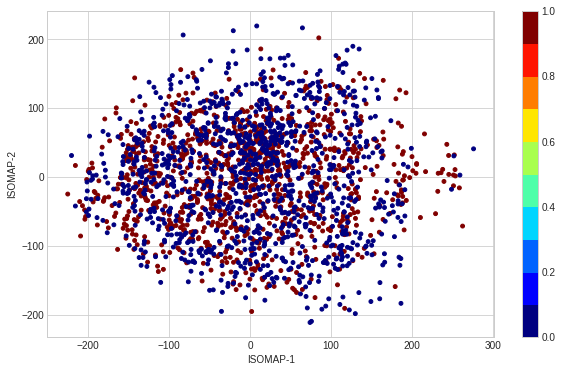

In [49]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize = (10, 6))
c_map = plt.cm.get_cmap('jet', 10)
plt.scatter(X_low[:, 0], X_low[:, 1], s = 15,
            cmap = c_map , c = lfw.target)
plt.colorbar()
plt.xlabel('ISOMAP-1') , plt.ylabel('ISOMAP-2')
plt.show()

In [50]:
iso = Isomap(n_components = 3)
resiso = iso.fit_transform(X)

In [51]:
resiso.shape

(2200, 3)

In [52]:
z = px.scatter_3d(
     resiso, x=0, y=1, z=2,
    color=lfw.target,
)
z.update_traces(marker_size=4)

**SVD**

In [53]:
from sklearn.decomposition import TruncatedSVD

svd =  TruncatedSVD(n_components = 2)
mat= svd.fit_transform(X)

In [54]:
 #first 5 elements
print("Transformed Matrix:")
print(mat[:5])

Transformed Matrix:
[[ 10.231161   -2.2649057]
 [-11.258958  -34.51089  ]
 [ 25.6855     26.446226 ]
 [ 60.36661    -4.817851 ]
 [ 35.84701    -8.1688385]]


In [55]:
print('n_components = 2 ', np.cumsum(svd.explained_variance_ratio_ * 100)[1])

n_components = 2  27.35347


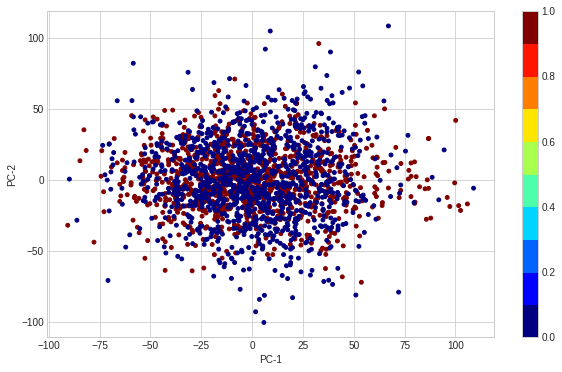

In [56]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize = (10, 6))
c_map = plt.cm.get_cmap('jet', 10)
plt.scatter(mat[:, 0], mat[:, 1], s = 15,
            cmap = c_map , c = lfw.target)
plt.colorbar()
plt.xlabel('PC-1') , plt.ylabel('PC-2')
plt.show()

In [57]:
svd1 =  TruncatedSVD(n_components = 3)
ressvd= svd1.fit_transform(X)

In [58]:
print('n_Components = 3 ', np.cumsum(svd1.explained_variance_ratio_ * 100)[2])

n_Components = 3  32.942303


In [59]:
y = px.scatter_3d(
     ressvd, x=0, y=1, z=2,
    color=lfw.target,
)
y.update_traces(marker_size=4)

**UMAP**

In [42]:
!pip install umap-learn

     |████████████████████████████████| 86 kB 3.1 MB/s 
     |████████████████████████████████| 1.1 MB 38.2 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.2-py3-none-any.whl size=82709 sha256=9534bd36fd4b582d64fbf42c8dc44bdb1d60d83670003a91b5271911200dce79
  Stored in directory: /root/.cache/pip/wheels/84/1b/c6/aaf68a748122632967cef4dffef68224eb16798b6793257d82
  Created wheel for pynndescent: filename=pynndescent-0.5.5-py3-none-any.whl size=52603 sha256=450ee121b96b8e865ddd9e051e049f685a87194301a873cb9cd459232b01a0da
  Stored in directory: /root/.cache/pip/wheels/af/e9/33/04db1436df0757c42fda8ea6796d7a8586e23c85fac355f476
Successfully built umap-learn pynndescent


In [60]:
import umap.umap_ as umap
trans = umap.UMAP(n_neighbors=5, random_state=42, n_components = 2).fit(X)

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning:

The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.



Text(0.5, 1.0, 'Embedding by UMAP')

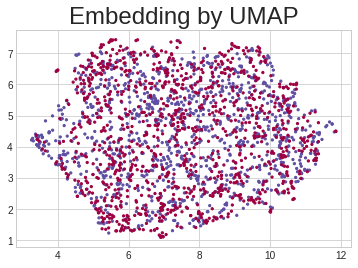

In [62]:
plt.scatter(trans.embedding_[:, 0], trans.embedding_[:, 1], s = 5, c = lfw.target, cmap = 'Spectral')
plt.title('Embedding by UMAP', fontsize=24)

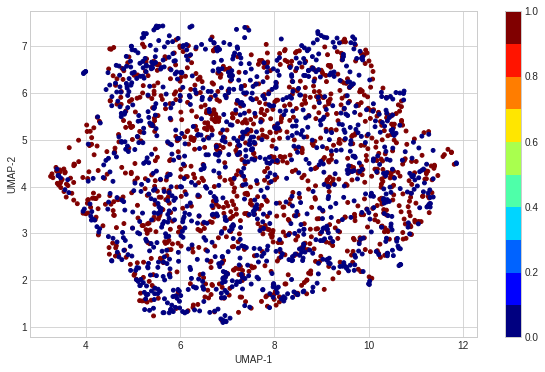

In [63]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize = (10, 6))
c_map = plt.cm.get_cmap('jet', 10)
plt.scatter(trans.embedding_[:, 0], trans.embedding_[:, 1], s = 15,
            cmap = c_map , c = lfw.target)
plt.colorbar()
plt.xlabel('UMAP-1') , plt.ylabel('UMAP-2')
plt.show()

In [64]:
umap_3d = umap.UMAP(n_components=3, init='random', random_state=0)

In [65]:
proj_3d = umap_3d.fit_transform(X)

In [66]:
fig_3d = px.scatter_3d(
    proj_3d, x=0, y=1, z=2,
    color=lfw.target, labels={'color': 'species'}
)
fig_3d.update_traces(marker_size=5)

**COMPARING**

In [67]:
from collections import OrderedDict
from functools import partial
from time import time
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter
from sklearn import manifold, datasets
from sklearn.decomposition import PCA

LLE: 75 sec
t-SNE: 88 sec
UMAP: 16 sec
ISOMAP: 72 sec
SVD: 0.71 sec
PCA: 0.97 sec


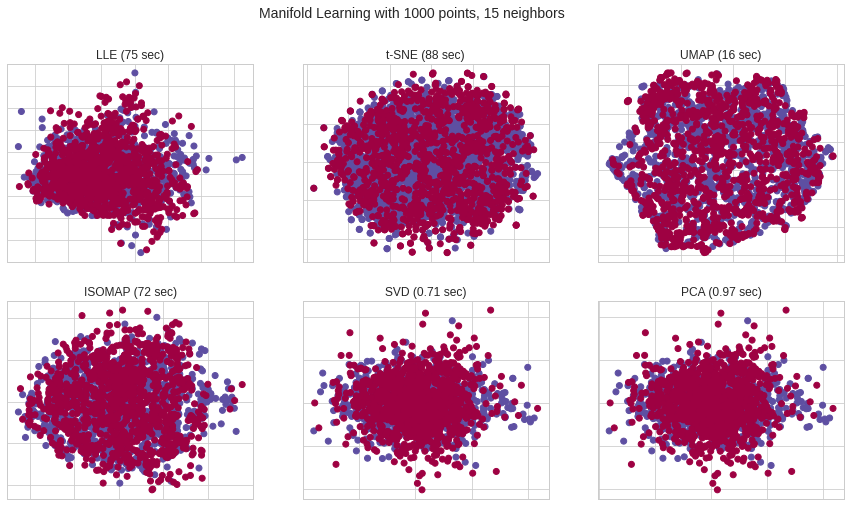

In [68]:
n_neighbors = 15
n_components = 2
# Creating the plot
fig = plt.figure(figsize=(15, 8))
fig.suptitle("Manifold Learning with %i points, %i neighbors"
             % (1000, n_neighbors), fontsize=14)

# Making a dictionary 'methods' containing LLE, t-SNE and PCA
LLE = partial(manifold.LocallyLinearEmbedding,
              n_neighbors, n_components, eigen_solver='auto')
methods = OrderedDict()
methods['LLE'] = LLE()
methods['t-SNE'] = manifold.TSNE(n_components=n_components, init='pca')
methods['UMAP'] = umap.UMAP(n_neighbors=5, random_state=42, n_components = 2)
methods['ISOMAP'] = Isomap(n_components = 2)
methods['SVD'] = TruncatedSVD(n_components = 2)
methods['PCA']=PCA(n_components=2)
# Plotting the results
for i, (label, method) in enumerate(methods.items()):
    t0 = time()
    Y = method.fit_transform(X)
    t1 = time()
    print("%s: %.2g sec" % (label, t1 - t0))
    ax = fig.add_subplot(2, 3, i + 1)
    ax.scatter(Y[:, 0], Y[:, 1], c=lfw.target, cmap=plt.cm.Spectral)
    ax.set_title("%s (%.2g sec)" % (label, t1 - t0))
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis('tight')
   
plt.show()

**REFERENCES**

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_lfw_pairs.html#sklearn.datasets.fetch_lfw_pairs

https://github.com/shukali/dimensionality-reduction-comparison

https://www.analyticsvidhya.com/blog/2021/04/difference-between-fit-transform-fit_transform-methods-in-scikit-learn-with-python-code/

https://scikit-learn.org/stable/modules/generated/sklearn.manifold.LocallyLinearEmbedding.html

https://stackoverflow.com/questions/8248467/matplotlib-tight-layout-doesnt-take-into-account-figure-suptitle

https://stackoverflow.com/questions/8248467/matplotlib-tight-layout-doesnt-take-into-account-figure-suptitle

https://medium.com/edviconedu/k-means-clustering-for-iris-dataset-in-google-colab-30a6d78556c4

https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.02-Introducing-Scikit-Learn.ipynb#scrollTo=OTAthmHn8cc0

https://github.com/dataprofessor/code/tree/master/python

https://www.youtube.com/watch?v=oiusrJ0btwA&ab_channel=DataProfessor

https://www.analyticsvidhya.com/blog/2018/08/dimensionality-reduction-techniques-python/

https://stackoverflow.com/questions/43977463/valueerror-could-not-broadcast-input-array-from-shape-224-224-3-into-shape-2

https://stackoverflow.com/questions/45062395/sklearn-typeerror-init-got-an-unexpected-keyword-argument-n-splits

https://stackoverflow.com/questions/61525287/numpy-valueerror-could-not-broadcast-input-array-from-shape-4-1-into-shape